## Imports

In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import folium

## Load data

In [3]:
# load the data
data_path = 'Datasets/2021-2023/CSB_2021-2023_All.csv'
initial_data = pd.read_csv(data_path)

/var/folders/n3/spvzfspj1gn51bldz75lhrt40000gn/T/ipykernel_66527/3892218257.py:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  initial_data = pd.read_csv(data_path)


In [4]:
# copy data (it's faster to copy than to load it again)
bike_data = initial_data.copy()

## Check for missing and Null data

In [5]:
# check for null values
bike_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    468710
start_station_id      468710
end_station_name      521058
end_station_id        521058
start_lat                  2
start_lng                  2
end_lat                13695
end_lng                13695
member_casual              0
dtype: int64

In [6]:
# check for missing values
bike_data.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    468710
start_station_id      468710
end_station_name      521058
end_station_id        521058
start_lat                  2
start_lng                  2
end_lat                13695
end_lng                13695
member_casual              0
dtype: int64

In [7]:
# It looks like there might be a problem with bike tracking, based on the missing start and end station info.
# There is significantly less data missing for the geodata (lat, lng) - maybe that can tell us where the bikes went

## Inspect the data

In [8]:
bike_data

ride_id  rideable_type           started_at  \
0        5CB9DFCECF79AF84   classic_bike  2021-01-01 00:08:33   
1        629E059504606547  electric_bike  2021-01-01 00:13:43   
2        E74069873161EE33  electric_bike  2021-01-01 00:14:32   
3        91F95E512CABC46A   classic_bike  2021-01-01 00:15:45   
4        DA46A05139C0EA2F   classic_bike  2021-01-01 00:17:46   
...                   ...            ...                  ...   
8180621  E802A8D89245438B  electric_bike  2023-06-30 23:57:43   
8180622  0448FEEB78F2B08D   classic_bike  2023-06-30 23:58:14   
8180623  5BE258BC59548BE9   classic_bike  2023-06-30 23:58:26   
8180624  5EAFC4B8F3E7680E  electric_bike  2023-06-30 23:59:01   
8180625  31813068FD8A3720   classic_bike  2023-06-30 23:59:35   

                    ended_at             start_station_name start_station_id  \
0        2021-01-01 00:33:53          Maine Ave & 9th St SW          31646.0   
1        2021-01-01 00:29:34                 10th & U St NW          31111.0   
2        2021-01-01 00:28:45          17th & Corcoran St NW          31214.0   
3        2021-01-01 00:21:20  Wilson Blvd. & N. Vermont St.          31926.0   
4        2021-01-01 00:21:00              11th & Park Rd NW          31651.0   
...                      ...                            ...              ...   
8180621  2023-07-01 00:07:16                            NaN              NaN   
8180622  2023-07-01 00:24:14    18th & New Hampshire Ave NW          31324.0   
8180623  2023-07-01 00:20:06    18th & New Hampshire Ave NW          31324.0   
8180624  2023-07-01 00:06:37    Adams Mill & Columbia Rd NW          31104.0   
8180625  2023-07-01 00:38:55       National Harbor Carousel          32423.0   

                                 end_station_name end_station_id  start_lat  \
0        Rosslyn Metro / Wilson Blvd & Ft Myer Dr        31015.0  38.880440   
1                                             NaN            NaN  38.917193   
2                            14th & Belmont St NW        31119.0  38.912138   
3                   Wilson Blvd. & N. Vermont St.        31926.0  38.879477   
4                             14th & Newton St NW        31649.0  38.931322   
...                                           ...            ...        ...   
8180621                       14th & Newton St NW        31649.0  38.910000   
8180622      Massachusetts Ave & Dupont Circle NW        31200.0  38.911268   
8180623      Massachusetts Ave & Dupont Circle NW        31200.0  38.911268   
8180624                                       NaN            NaN  38.923005   
8180625                  National Harbor Carousel        32423.0  38.785900   

         start_lng    end_lat    end_lng member_casual  
0       -77.025236  38.894600 -77.072305        member  
1       -77.025894  38.960000 -77.020000        casual  
2       -77.038568  38.920870 -77.031691        member  
3       -77.114563  38.879477 -77.114563        member  
4       -77.028247  38.931991 -77.032956        member  
...            ...        ...        ...           ...  
8180621 -77.030000  38.931991 -77.032956        member  
8180622 -77.041829  38.910100 -77.044400        casual  
8180623 -77.041829  38.910100 -77.044400        casual  
8180624 -77.042420  38.930000 -77.030000        member  
8180625 -77.016700  38.785900 -77.016700        casual  

[8180626 rows x 13 columns]

In [9]:
# check data types
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8180626 entries, 0 to 8180625
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 811.4+ MB


In [10]:
bike_data.describe()

start_lat     start_lng       end_lat       end_lng
count  8.180624e+06  8.180624e+06  8.166931e+06  8.166931e+06
mean   3.890293e+01 -7.703172e+01  3.890184e+01 -7.703127e+01
std    2.656915e-02  3.286265e-02  5.567502e-02  1.025279e-01
min    3.877000e+01 -7.740000e+01  0.000000e+00 -7.756000e+01
25%    3.889050e+01 -7.704468e+01  3.889046e+01 -7.704468e+01
50%    3.890267e+01 -7.703174e+01  3.890206e+01 -7.703169e+01
75%    3.891369e+01 -7.701377e+01  3.891261e+01 -7.701350e+01
max    3.913000e+01 -7.682000e+01  3.918000e+01  0.000000e+00

In [11]:
# Because a lot of columns are of type object, we don't get much out of the data.
# Let's convert the column dtypes.

## Convert dtypes

In [12]:
# convert the object type columns to more useful data types

# convert categorical data
bike_data['rideable_type'] = pd.Categorical(bike_data['rideable_type'])
bike_data['member_casual'] = pd.Categorical(bike_data['member_casual'])

# convert datetime data
bike_data['started_at'] = pd.to_datetime(bike_data['started_at'])
bike_data['ended_at'] = pd.to_datetime(bike_data['ended_at'])

# droping the two rows with 'MTL-ECO5-03' as this is probably an error
bike_data = bike_data.drop(bike_data[bike_data['end_station_id'] == 'MTL-ECO5-03'].index)

# convert station id's to float
bike_data['end_station_id'] = pd.to_numeric(bike_data['end_station_id'], errors='coerce')
bike_data['start_station_id'] = pd.to_numeric(bike_data['start_station_id'], errors='coerce')

## Inspect the data again

In [13]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8180624 entries, 0 to 8180625
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    float64       
 6   end_station_name    object        
 7   end_station_id      float64       
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(2), datetime64[ns](2), float64(6), object(3)
memory usage: 764.6+ MB


In [14]:
bike_data.describe()

started_at                       ended_at  \
count                        8180624                        8180624   
mean   2022-05-21 15:41:19.305605376  2022-05-21 16:05:15.981119744   
min              2021-01-01 00:08:33            2021-01-01 00:21:00   
25%              2021-10-05 22:01:12  2021-10-05 22:24:05.750000128   
50%       2022-06-15 10:14:12.500000            2022-06-15 10:39:25   
75%    2022-12-11 21:21:40.750000128     2022-12-11 21:35:58.500000   
max              2023-06-30 23:59:35            2023-07-11 02:02:21   
std                              NaN                            NaN   

       start_station_id  end_station_id     start_lat     start_lng  \
count      7.711914e+06    7.659566e+06  8.180624e+06  8.180624e+06   
mean       3.136749e+04    3.136883e+04  3.890293e+01 -7.703172e+01   
min        3.020000e+04    3.020000e+04  3.877000e+01 -7.740000e+01   
25%        3.121200e+04    3.121400e+04  3.889050e+01 -7.704468e+01   
50%        3.127700e+04    3.127500e+04  3.890267e+01 -7.703174e+01   
75%        3.160500e+04    3.160800e+04  3.891369e+01 -7.701377e+01   
max        3.320000e+04    3.320000e+04  3.913000e+01 -7.682000e+01   
std        2.585772e+02    2.581412e+02  2.656915e-02  3.286265e-02   

            end_lat       end_lng  
count  8.166931e+06  8.166931e+06  
mean   3.890184e+01 -7.703127e+01  
min    0.000000e+00 -7.756000e+01  
25%    3.889046e+01 -7.704468e+01  
50%    3.890206e+01 -7.703169e+01  
75%    3.891261e+01 -7.701350e+01  
max    3.918000e+01  0.000000e+00  
std    5.567502e-02  1.025279e-01

In [15]:
bike_data

ride_id  rideable_type          started_at  \
0        5CB9DFCECF79AF84   classic_bike 2021-01-01 00:08:33   
1        629E059504606547  electric_bike 2021-01-01 00:13:43   
2        E74069873161EE33  electric_bike 2021-01-01 00:14:32   
3        91F95E512CABC46A   classic_bike 2021-01-01 00:15:45   
4        DA46A05139C0EA2F   classic_bike 2021-01-01 00:17:46   
...                   ...            ...                 ...   
8180621  E802A8D89245438B  electric_bike 2023-06-30 23:57:43   
8180622  0448FEEB78F2B08D   classic_bike 2023-06-30 23:58:14   
8180623  5BE258BC59548BE9   classic_bike 2023-06-30 23:58:26   
8180624  5EAFC4B8F3E7680E  electric_bike 2023-06-30 23:59:01   
8180625  31813068FD8A3720   classic_bike 2023-06-30 23:59:35   

                   ended_at             start_station_name  start_station_id  \
0       2021-01-01 00:33:53          Maine Ave & 9th St SW           31646.0   
1       2021-01-01 00:29:34                 10th & U St NW           31111.0   
2       2021-01-01 00:28:45          17th & Corcoran St NW           31214.0   
3       2021-01-01 00:21:20  Wilson Blvd. & N. Vermont St.           31926.0   
4       2021-01-01 00:21:00              11th & Park Rd NW           31651.0   
...                     ...                            ...               ...   
8180621 2023-07-01 00:07:16                            NaN               NaN   
8180622 2023-07-01 00:24:14    18th & New Hampshire Ave NW           31324.0   
8180623 2023-07-01 00:20:06    18th & New Hampshire Ave NW           31324.0   
8180624 2023-07-01 00:06:37    Adams Mill & Columbia Rd NW           31104.0   
8180625 2023-07-01 00:38:55       National Harbor Carousel           32423.0   

                                 end_station_name  end_station_id  start_lat  \
0        Rosslyn Metro / Wilson Blvd & Ft Myer Dr         31015.0  38.880440   
1                                             NaN             NaN  38.917193   
2                            14th & Belmont St NW         31119.0  38.912138   
3                   Wilson Blvd. & N. Vermont St.         31926.0  38.879477   
4                             14th & Newton St NW         31649.0  38.931322   
...                                           ...             ...        ...   
8180621                       14th & Newton St NW         31649.0  38.910000   
8180622      Massachusetts Ave & Dupont Circle NW         31200.0  38.911268   
8180623      Massachusetts Ave & Dupont Circle NW         31200.0  38.911268   
8180624                                       NaN             NaN  38.923005   
8180625                  National Harbor Carousel         32423.0  38.785900   

         start_lng    end_lat    end_lng member_casual  
0       -77.025236  38.894600 -77.072305        member  
1       -77.025894  38.960000 -77.020000        casual  
2       -77.038568  38.920870 -77.031691        member  
3       -77.114563  38.879477 -77.114563        member  
4       -77.028247  38.931991 -77.032956        member  
...            ...        ...        ...           ...  
8180621 -77.030000  38.931991 -77.032956        member  
8180622 -77.041829  38.910100 -77.044400        casual  
8180623 -77.041829  38.910100 -77.044400        casual  
8180624 -77.042420  38.930000 -77.030000        member  
8180625 -77.016700  38.785900 -77.016700        casual  

[8180624 rows x 13 columns]

In [16]:
# check for missing values
bike_data.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    468710
start_station_id      468710
end_station_name      521058
end_station_id        521058
start_lat                  0
start_lng                  0
end_lat                13693
end_lng                13693
member_casual              0
dtype: int64

In [17]:
# Now we see more in the data, but still not a lot based on the describe function.
# Interesting is that the last ride ended 11 days after the last ride started.
# We fortunately got rid of the missing data in start_lat/lng by deleting 'MTL-ECO5-03'.

## Investigate the station data

In [18]:
# how many start station names do we have?
start_station_name_count = len(bike_data['start_station_name'].value_counts())
print(f'start_station_name count: {start_station_name_count}')

# how many start station IDs do we have?
start_station_id_count = len(bike_data['start_station_id'].value_counts())
print(f'start_station_id count: {start_station_id_count}')

print(f'difference: {start_station_name_count - start_station_id_count}')

print()

# how many end station names do we have?
end_station_name_count = len(bike_data['end_station_name'].value_counts())
print(f'end_station_name count: {end_station_name_count}')

# how many end station IDs do we have?
end_station_id_count = len(bike_data['end_station_id'].value_counts())
print(f'end_station_id count: {end_station_id_count}')

print(f'difference: {end_station_name_count - end_station_id_count}')


start_station_name count: 815
start_station_id count: 745
difference: 70

end_station_name count: 818
end_station_id count: 748
difference: 70


In [19]:
# There is 3 more end stations than start stations
# There is 70 more names than ID's
# How many stations do we actually have?
# why are the station names inconsistent?


In [20]:
# make a df with all the unique combinations of start_station_name and start_station_id.
start_stations = bike_data[['start_station_name', 'start_station_id']].drop_duplicates(ignore_index=True)
start_stations

start_station_name  start_station_id
0              Maine Ave & 9th St SW           31646.0
1                     10th & U St NW           31111.0
2              17th & Corcoran St NW           31214.0
3      Wilson Blvd. & N. Vermont St.           31926.0
4                  11th & Park Rd NW           31651.0
..                               ...               ...
813          Emma Lee St & Morris St           32266.0
814             Route 29 & Bisvey Dr           32267.0
815      Jones Branch Dr & Blyton St           32269.0
816        Arlington Blvd & Allen St           32268.0
817  Westbranch Dr & Jones Branch Dr           32270.0

[818 rows x 2 columns]

In [21]:
# show the rows with duplicated IDs
start_stations_duplicated_ids = start_stations[start_stations.duplicated(subset='start_station_id', keep=False)].sort_values(by=['start_station_id'])
start_stations_duplicated_ids

start_station_name  start_station_id
389                          Army Navy Dr & S Joyce St           31006.0
759       Pentagon Row Plaza / Army Navy Dr & Joyce St           31006.0
755                             19th St N & Ft Myer Dr           31014.0
152                            Lynn St & 19th St North           31014.0
245           Rosslyn Metro / Wilson Blvd & Ft Myer Dr           31015.0
..                                                 ...               ...
756                  Founders Row/W Broad St & West St           32600.0
362  George Mason High School / Haycock Rd & Leesbu...           32600.0
660  Meridian High School / Haycock Rd & Leesburg Pike           32600.0
720                                        Eden Center           32601.0
546          State Theatre / Park Pl & N Washington St           32601.0

[141 rows x 2 columns]

In [22]:
# Did they change the name at a given point in time?
# Let's check it by adding the highest and lowest date to the names

In [23]:
# get minimum start times
min_start_times = bike_data.groupby('start_station_name')['started_at'].min().reset_index()

# get maximum start times
max_start_times = bike_data.groupby('start_station_name')['started_at'].max().reset_index()

# get minimum end times
min_end_times = bike_data.groupby('start_station_name')['ended_at'].min().reset_index()

# get maximum end times
max_end_times = bike_data.groupby('start_station_name')['ended_at'].max().reset_index()

In [24]:
# merge start_stations_duplicated_ids with min_start_times
start_stations_duplicated_ids = pd.merge(start_stations_duplicated_ids, min_start_times, on='start_station_name', how='left')
# rename the columns for clarity
start_stations_duplicated_ids = start_stations_duplicated_ids.rename(columns={'started_at': 'min_started_at'})

# merge start_stations_duplicated_ids with max_start_times
start_stations_duplicated_ids = pd.merge(start_stations_duplicated_ids, max_start_times, on='start_station_name', how='left')
# rename the columns for clarity
start_stations_duplicated_ids = start_stations_duplicated_ids.rename(columns={'started_at': 'max_started_at'})

# merge start_stations_duplicated_ids with max_start_times
start_stations_duplicated_ids = pd.merge(start_stations_duplicated_ids, min_end_times, on='start_station_name', how='left')
# rename the columns for clarity
start_stations_duplicated_ids = start_stations_duplicated_ids.rename(columns={'ended_at': 'min_ended_at'})

# merge start_stations_duplicated_ids with max_start_times
start_stations_duplicated_ids = pd.merge(start_stations_duplicated_ids, max_end_times, on='start_station_name', how='left')
# rename the columns for clarity
start_stations_duplicated_ids = start_stations_duplicated_ids.rename(columns={'ended_at': 'max_ended_at'})

start_stations_duplicated_ids

start_station_name  start_station_id  \
0                            Army Navy Dr & S Joyce St           31006.0   
1         Pentagon Row Plaza / Army Navy Dr & Joyce St           31006.0   
2                               19th St N & Ft Myer Dr           31014.0   
3                              Lynn St & 19th St North           31014.0   
4             Rosslyn Metro / Wilson Blvd & Ft Myer Dr           31015.0   
..                                                 ...               ...   
136                  Founders Row/W Broad St & West St           32600.0   
137  George Mason High School / Haycock Rd & Leesbu...           32600.0   
138  Meridian High School / Haycock Rd & Leesburg Pike           32600.0   
139                                        Eden Center           32601.0   
140          State Theatre / Park Pl & N Washington St           32601.0   

         min_started_at      max_started_at        min_ended_at  \
0   2021-01-02 11:47:22 2022-12-09 15:06:24 2021-01-02 12:15:11   
1   2022-12-09 16:53:44 2023-06-30 23:28:11 2022-12-09 17:11:14   
2   2022-11-15 19:46:20 2023-06-30 20:56:17 2022-11-15 20:04:29   
3   2021-01-01 09:37:56 2022-11-18 08:18:12 2021-01-01 09:55:35   
4   2021-01-01 14:33:57 2021-08-11 16:35:41 2021-01-01 14:52:06   
..                  ...                 ...                 ...   
136 2022-12-02 16:27:58 2023-06-30 13:40:57 2022-12-02 16:46:26   
137 2021-01-02 11:03:01 2021-07-22 18:22:21 2021-01-02 14:50:46   
138 2021-07-27 15:45:59 2022-12-01 06:16:33 2021-07-27 15:52:29   
139 2022-06-15 17:52:57 2023-06-30 14:17:12 2022-06-15 17:59:48   
140 2021-01-05 12:17:52 2022-06-13 14:30:33 2021-01-05 12:41:48   

           max_ended_at  
0   2022-12-09 15:26:17  
1   2023-06-30 23:30:27  
2   2023-06-30 21:02:50  
3   2022-11-18 08:27:08  
4   2021-08-11 17:02:38  
..                  ...  
136 2023-06-30 13:46:47  
137 2021-07-22 18:30:14  
138 2022-12-01 06:20:54  
139 2023-06-30 14:21:27  
140 2022-06-13 14:59:22  

[141 rows x 6 columns]

In [25]:
# see if the duplicates are always 2 or more?

In [26]:
start_stations_duplicated_ids['start_station_id'].value_counts()

start_station_id
32600.0    3
31094.0    3
31923.0    3
31006.0    2
31908.0    2
          ..
31261.0    2
31293.0    2
31305.0    2
31331.0    2
32601.0    2
Name: count, Length: 69, dtype: int64

In [27]:
start_stations_duplicated_ids[start_stations_duplicated_ids['start_station_id'] == 31923.0]

start_station_name  start_station_id      min_started_at  \
91    Columbia Pike & George Mason Dr           31923.0 2021-08-06 19:07:05   
92        Columbia Pike & S Taylor St           31923.0 2021-01-02 08:42:36   
93  Columbia Pike & S George Mason Dr           31923.0 2022-12-09 16:36:14   

        max_started_at        min_ended_at        max_ended_at  
91 2022-12-09 08:09:29 2021-08-09 23:08:30 2022-12-09 08:25:00  
92 2021-08-12 19:36:02 2021-01-02 10:28:12 2021-08-12 19:51:41  
93 2023-06-30 22:02:13 2022-12-09 16:46:55 2023-06-30 22:16:11

In [50]:
m=folium.Map(location=[38.859306, -77.102019], zoom_start=12)

# Add markers to the map from the DataFrame
for index, row in bike_data[(bike_data['start_station_id'] == 31293.0)].iterrows():
    folium.Marker([row['start_lat'], row['start_lng']]).add_to(m)

m

In [29]:
start_stations_duplicated_ids.to_csv('start_stations_duplicated_ids.csv')

In [30]:
start_stations_duplicated_ids.groupby('start_station_id')['min_started_at'].max()

start_station_id
31006.0   2022-12-09 16:53:44
31014.0   2022-11-15 19:46:20
31015.0   2021-08-12 10:22:19
31027.0   2021-01-27 17:13:54
31030.0   2021-07-22 11:33:57
                  ...        
32215.0   2022-09-30 21:23:46
32220.0   2023-03-06 12:58:01
32243.0   2022-11-01 16:29:00
32600.0   2022-12-02 16:27:58
32601.0   2022-06-15 17:52:57
Name: min_started_at, Length: 69, dtype: datetime64[ns]

In [31]:
start_stations_duplicated_ids.groupby('start_station_id')['max_started_at'].min()

start_station_id
31006.0   2022-12-09 15:06:24
31014.0   2022-11-18 08:18:12
31015.0   2021-08-11 16:35:41
31027.0   2021-01-26 13:37:58
31030.0   2021-07-22 10:56:34
                  ...        
32215.0   2022-09-29 17:54:32
32220.0   2023-03-05 16:55:53
32243.0   2022-10-23 14:34:34
32600.0   2021-07-22 18:22:21
32601.0   2022-06-13 14:30:33
Name: max_started_at, Length: 69, dtype: datetime64[ns]

In [32]:
# Group by 'start_station_id' and calculate the desired subtraction
result = (
    start_stations_duplicated_ids.groupby('start_station_id')
    .agg(min_started_at_max=('min_started_at', 'max'), max_started_at_min=('max_started_at', 'min'))
)

# Perform the subtraction directly
result['difference'] = result['min_started_at_max'] - result['max_started_at_min']

print(result)

                  min_started_at_max  max_started_at_min        difference
start_station_id                                                          
31006.0          2022-12-09 16:53:44 2022-12-09 15:06:24   0 days 01:47:20
31014.0          2022-11-15 19:46:20 2022-11-18 08:18:12 -3 days +11:28:08
31015.0          2021-08-12 10:22:19 2021-08-11 16:35:41   0 days 17:46:38
31027.0          2021-01-27 17:13:54 2021-01-26 13:37:58   1 days 03:35:56
31030.0          2021-07-22 11:33:57 2021-07-22 10:56:34   0 days 00:37:23
...                              ...                 ...               ...
32215.0          2022-09-30 21:23:46 2022-09-29 17:54:32   1 days 03:29:14
32220.0          2023-03-06 12:58:01 2023-03-05 16:55:53   0 days 20:02:08
32243.0          2022-11-01 16:29:00 2022-10-23 14:34:34   9 days 01:54:26
32600.0          2022-12-02 16:27:58 2021-07-22 18:22:21 497 days 22:05:37
32601.0          2022-06-15 17:52:57 2022-06-13 14:30:33   2 days 03:22:24

[69 rows x 3 columns]


In [33]:
import pandas as pd

# Sample data
data = {
    'start_station_id': [1, 1, 2, 2],
    'min_started_at': ['2022-01-01 08:00:00', '2022-01-01 09:30:00', '2022-01-01 10:45:00', '2022-01-01 08:30:00'],
    'max_started_at': ['2022-01-01 12:00:00', '2022-01-01 14:00:00', '2022-01-01 15:30:00', '2022-01-01 18:00:00']
}

df = pd.DataFrame(data)

# Convert 'min_started_at' and 'max_started_at' to datetime
df['min_started_at'] = pd.to_datetime(df['min_started_at'])
df['max_started_at'] = pd.to_datetime(df['max_started_at'])

# Group by 'start_station_id' and calculate the desired subtraction
result = (
    df.groupby('start_station_id')
    .agg(min_started_at_max=('min_started_at', 'max'), max_started_at_min=('max_started_at', 'min'))
)

# Perform the subtraction directly
result['difference'] = result['min_started_at_max'] - result['max_started_at_min']

print(result)


                  min_started_at_max  max_started_at_min        difference
start_station_id                                                          
1                2022-01-01 09:30:00 2022-01-01 12:00:00 -1 days +21:30:00
2                2022-01-01 10:45:00 2022-01-01 15:30:00 -1 days +19:15:00


In [34]:
# show the rows with duplicated names
start_stations[start_stations.duplicated(subset='start_station_name', keep=False)].sort_values(by=['start_station_name'])

start_station_name  start_station_id
101      16th & Harvard St NW           31103.0
707      16th & Harvard St NW           31135.0
723  Fairfax Dr & N Taylor St           31974.0
724  Fairfax Dr & N Taylor St           31049.0

In [35]:
# TODO: Can the missing stations be reproduced?

In [36]:
bike_data[bike_data['end_station_id'] == 31937.0]['end_station_name'].unique()

array(['Ft Myer Dr & Arlington Blvd', 'Arlington Blvd & Ft Myer Dr'],
      dtype=object)

In [37]:
bike_data[bike_data['end_station_id'] == 31937.0]

ride_id  rideable_type          started_at  \
4308     4210527F0315A433   classic_bike 2021-01-02 15:05:57   
4312     435B7328190195CC   classic_bike 2021-01-02 15:06:07   
5571     4F9251A16383C749   classic_bike 2021-01-02 16:59:52   
7765     1775C7BB291044AA   classic_bike 2021-01-03 15:52:10   
16630    37D1E9A46E2CC416    docked_bike 2021-01-06 15:55:46   
...                   ...            ...                 ...   
8169449  F8BBFA0BF694384B   classic_bike 2023-06-30 09:02:56   
8174604  15ACD01732BED481  electric_bike 2023-06-30 15:58:16   
8174773  8839C343DA8E04F7   classic_bike 2023-06-30 16:06:59   
8176476  83D204AD6534E787   classic_bike 2023-06-30 17:55:55   
8177846  9CA007B1077F1979   classic_bike 2023-06-30 19:14:12   

                   ended_at                        start_station_name  \
4308    2021-01-02 15:21:28                 Wilson Blvd & N Quincy St   
4312    2021-01-02 15:21:28                 Wilson Blvd & N Quincy St   
5571    2021-01-02 17:32:02                 Jefferson Dr & 14th St SW   
7765    2021-01-03 16:19:41                          Lincoln Memorial   
16630   2021-01-06 17:05:49          Constitution Ave & 2nd St NW/DOL   
...                     ...                                       ...   
8169449 2023-06-30 09:16:57               18th & New Hampshire Ave NW   
8174604 2023-06-30 16:00:21                    N Lynn St & Fairfax Dr   
8174773 2023-06-30 16:09:37                  Wilson Blvd & Ft Myer Dr   
8176476 2023-06-30 17:58:57                  Wilson Blvd & Ft Myer Dr   
8177846 2023-06-30 19:18:25  Rosslyn Metro / Wilson Blvd & N Moore St   

         start_station_id             end_station_name  end_station_id  \
4308              31039.0  Ft Myer Dr & Arlington Blvd         31937.0   
4312              31039.0  Ft Myer Dr & Arlington Blvd         31937.0   
5571              31247.0  Ft Myer Dr & Arlington Blvd         31937.0   
7765              31258.0  Ft Myer Dr & Arlington Blvd         31937.0   
16630             31271.0  Ft Myer Dr & Arlington Blvd         31937.0   
...                   ...                          ...             ...   
8169449           31324.0  Arlington Blvd & Ft Myer Dr         31937.0   
8174604           31917.0  Arlington Blvd & Ft Myer Dr         31937.0   
8174773           31015.0  Arlington Blvd & Ft Myer Dr         31937.0   
8176476           31015.0  Arlington Blvd & Ft Myer Dr         31937.0   
8177846           31947.0  Arlington Blvd & Ft Myer Dr         31937.0   

         start_lat  start_lng    end_lat    end_lng member_casual  
4308     38.880012 -77.107854  38.890863 -77.074893        casual  
4312     38.880012 -77.107854  38.890863 -77.074893        casual  
5571     38.888553 -77.032427  38.890863 -77.074893        casual  
7765     38.888255 -77.049436  38.890863 -77.074893        casual  
16630    38.892275 -77.013917  38.890863 -77.074893        casual  
...            ...        ...        ...        ...           ...  
8169449  38.911268 -77.041829  38.890863 -77.074893        casual  
8174604  38.893750 -77.070932  38.890863 -77.074893        member  
8174773  38.894600 -77.072305  38.890863 -77.074893        member  
8176476  38.894600 -77.072305  38.890863 -77.074893        casual  
8177846  38.896087 -77.071452  38.890863 -77.074893        member  

[5991 rows x 13 columns]

In [38]:
bike_data[['end_station_name', 'end_station_id']].drop_duplicates().to_csv('station_name_id.csv')

Yes, they are.

Investigate the missing station names/ids

In [39]:
# investigate the missing values
bike_data[bike_data['start_station_id'].isna()]

ride_id  rideable_type          started_at  \
5        0FD3B4B2152425C3  electric_bike 2021-01-01 00:18:16   
20       997E8E08C493F034  electric_bike 2021-01-01 00:27:18   
22       87E06BFC439643DA  electric_bike 2021-01-01 00:32:44   
24       6E4F247C2E3358BA  electric_bike 2021-01-01 00:35:51   
37       60807578738CDEB8  electric_bike 2021-01-01 00:50:13   
...                   ...            ...                 ...   
8180602  EB82BDB804277B1E  electric_bike 2023-06-30 23:54:09   
8180609  7892BA16C781301C  electric_bike 2023-06-30 23:55:25   
8180614  C215A43FB51B4F54  electric_bike 2023-06-30 23:55:44   
8180620  BA67AE126D50EE25  electric_bike 2023-06-30 23:57:29   
8180621  E802A8D89245438B  electric_bike 2023-06-30 23:57:43   

                   ended_at start_station_name  start_station_id  \
5       2021-01-01 00:29:05                NaN               NaN   
20      2021-01-01 00:34:30                NaN               NaN   
22      2021-01-01 00:32:51                NaN               NaN   
24      2021-01-01 00:37:57                NaN               NaN   
37      2021-01-01 00:57:14                NaN               NaN   
...                     ...                ...               ...   
8180602 2023-07-01 00:01:59                NaN               NaN   
8180609 2023-07-01 00:08:17                NaN               NaN   
8180614 2023-07-01 00:16:58                NaN               NaN   
8180620 2023-07-01 00:00:07                NaN               NaN   
8180621 2023-07-01 00:07:16                NaN               NaN   

                                  end_station_name  end_station_id  start_lat  \
5                      Georgia Ave & Kennedy St NW         31415.0      38.93   
20                                             NaN             NaN      38.99   
22                                             NaN             NaN      38.89   
24       Lincoln Park / 13th & East Capitol St NE          31619.0      38.89   
37                                             NaN             NaN      38.95   
...                                            ...             ...        ...   
8180602                                        NaN             NaN      38.88   
8180609                      Cordell & Norfolk Ave         32008.0      38.98   
8180614                                        NaN             NaN      38.92   
8180620                                        NaN             NaN      38.96   
8180621                        14th & Newton St NW         31649.0      38.91   

         start_lng    end_lat    end_lng member_casual  
5           -77.03  38.956738 -77.027940        casual  
20          -77.03  38.990000 -77.030000        member  
22          -76.99  38.890000 -76.990000        casual  
24          -76.99  38.890484 -76.988408        casual  
37          -77.03  38.930000 -77.040000        casual  
...            ...        ...        ...           ...  
8180602     -77.01  38.870000 -77.010000        member  
8180609     -77.09  38.989540 -77.098029        casual  
8180614     -77.03  38.880000 -77.020000        member  
8180620     -77.00  38.960000 -77.000000        member  
8180621     -77.03  38.931991 -77.032956        member  

[468710 rows x 13 columns]

In [40]:
# what type of bikes are missing start stations?
bike_data[bike_data['start_station_id'].isna()]['rideable_type'].value_counts()

rideable_type
electric_bike    468710
classic_bike          0
docked_bike           0
Name: count, dtype: int64

Electric bikes **DON'T NEED** to have a start station.

In [41]:
# what types of bikes are missing end stations?
bike_data[bike_data['end_station_id'].isna()]['rideable_type'].value_counts()

rideable_type
electric_bike    499453
classic_bike      17034
docked_bike        4571
Name: count, dtype: int64

Let's have a look at the docked bikes firs.

In [42]:
# do we maybe have geolocation for the docked bikes?
bike_data[(bike_data['end_station_name'].isna()) & (bike_data['rideable_type'] == 'docked_bike')]['end_lat'].isna().value_counts()

end_lat
True    4571
Name: count, dtype: int64

In [43]:
# who used those bikes?
bike_data[(bike_data['end_station_name'].isna()) & (bike_data['rideable_type'] == 'docked_bike')]['member_casual'].value_counts()

member_casual
casual    4571
member       0
Name: count, dtype: int64

Looks like the **docked bikes** that disappeared have been used by **casual members**.

How about classic bikes?

In [44]:
# do we maybe have geolocation for the classic bikes?
bike_data[(bike_data['end_station_id'].isna()) & (bike_data['rideable_type'] == 'classic_bike')]['end_lat'].isna().value_counts()

end_lat
True     9122
False    7912
Name: count, dtype: int64

In [45]:
# who used those bikes?
bike_data[(bike_data['end_station_name'].isna()) & (bike_data['rideable_type'] == 'classic_bike')]['member_casual'].value_counts()

member_casual
casual    9687
member    7347
Name: count, dtype: int64

In [46]:
# let's investigate the existing geolocation data for missed bikes
bike_data[(bike_data['end_station_name'].isna()) & (bike_data['rideable_type'] == 'classic_bike') & (bike_data['end_lat'].notna())]

ride_id rideable_type          started_at  \
671      A065F84C99F27AF4  classic_bike 2021-01-01 14:20:37   
1648     FCB1785D2FEDEE3C  classic_bike 2021-01-02 11:08:22   
1649     9FA222683B8CA273  classic_bike 2021-01-02 11:08:23   
1670     FE10B1D71D7172D2  classic_bike 2021-01-02 11:12:51   
1922     5998539D73DE30C5  classic_bike 2021-01-02 11:48:38   
...                   ...           ...                 ...   
8111517  C561F329660E9C06  classic_bike 2023-06-25 22:06:45   
8121095  5443B99A17576B7C  classic_bike 2023-06-26 18:01:05   
8122785  C97385251E3DCCF8  classic_bike 2023-06-26 19:30:41   
8134053  F9492B68EB45964E  classic_bike 2023-06-27 18:02:01   
8151098  1503142F66923F37  classic_bike 2023-06-28 19:51:31   

                   ended_at                            start_station_name  \
671     2021-01-01 14:47:40                   Arlington Blvd & N Queen St   
1648    2021-01-02 11:33:36                              Roosevelt Island   
1649    2021-01-02 11:33:36                              Roosevelt Island   
1670    2021-01-02 17:51:04                          15th St & N Scott St   
1922    2021-01-03 06:38:11                           River Rd & Landy Ln   
...                     ...                                           ...   
8111517 2023-06-26 23:06:37  Tenleytown / Wisconsin Ave & Albemarle St NW   
8121095 2023-06-27 19:01:00                        Congress Heights Metro   
8122785 2023-06-27 20:30:33                                 1st & D St SE   
8134053 2023-06-28 19:01:55                    Frederick Ave & Horners Ln   
8151098 2023-06-29 20:51:12                          Prince St & Union St   

         start_station_id end_station_name  end_station_id  start_lat  \
671               31051.0              NaN             NaN  38.889365   
1648              31062.0              NaN             NaN  38.896553   
1649              31062.0              NaN             NaN  38.896553   
1670              31031.0              NaN             NaN  38.890540   
1922              32046.0              NaN             NaN  38.964992   
...                   ...              ...             ...        ...   
8111517           31303.0              NaN             NaN  38.947607   
8121095           31806.0              NaN             NaN  38.844711   
8122785           31643.0              NaN             NaN  38.884916   
8134053           32009.0              NaN             NaN  39.094772   
8151098           31041.0              NaN             NaN  38.803124   

         start_lng  end_lat  end_lng member_casual  
671     -77.077294    38.91   -77.07        member  
1648    -77.067140    38.86   -77.05        casual  
1649    -77.067140    38.86   -77.05        member  
1670    -77.080950    38.89   -77.08        casual  
1922    -77.103381    38.98   -77.10        casual  
...            ...      ...      ...           ...  
8111517 -77.079382    38.95   -77.07        member  
8121095 -76.987823    38.84   -77.00        casual  
8122785 -77.005965    38.89   -76.99        member  
8134053 -77.145213    39.08   -77.15        member  
8151098 -77.040363    38.80   -77.04        casual  

[7912 rows x 13 columns]

In [47]:
bike_data.groupby(by=['member_casual', 'rideable_type'])['start_station_name'].count()

/var/folders/n3/spvzfspj1gn51bldz75lhrt40000gn/T/ipykernel_66527/3320699358.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_data.groupby(by=['member_casual', 'rideable_type'])['start_station_name'].count()


member_casual  rideable_type
casual         classic_bike     2153320
               docked_bike       501957
               electric_bike     433900
member         classic_bike     4004289
               docked_bike            2
               electric_bike     618446
Name: start_station_name, dtype: int64

Looks like some of the lost **classic bikes** have very short **lat** and **lng** coordinates.

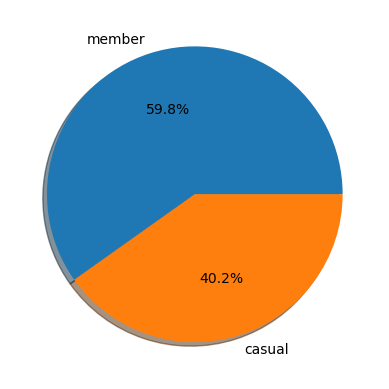

In [48]:
# check membership type and visualize

# create a figure and axis
fig1, ax1 = plt.subplots()

# data for the pie chart (based on the amount of entries per wine data set)
data = bike_data['member_casual'].value_counts()

# labels for each section of the pie chart
labels=bike_data['member_casual'].value_counts().index

# plot the pie chart (also show % using autopct, add a shadow and explode for aesthetics)
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True)

# show the plot
plt.show()

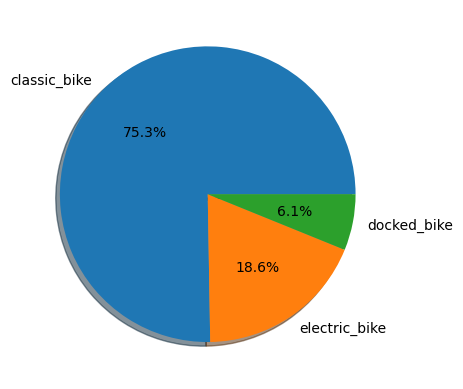

In [49]:
# check bike type and visualize

# create a figure and axis
fig1, ax1 = plt.subplots()

# data for the pie chart (based on the amount of entries per wine data set)
data = bike_data['rideable_type'].value_counts()

# labels for each section of the pie chart
labels=bike_data['rideable_type'].value_counts().index

# plot the pie chart (also show % using autopct, add a shadow and explode for aesthetics)
ax1.pie(data, labels=labels, autopct='%1.1f%%', shadow=True)

# show the plot
plt.show()